<a href="https://colab.research.google.com/github/vlad-vlg/Jupyter/blob/develop/Third.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Третий файл

In [ ]:
print('Hello, world!')

Hello, world!


$\frac{n!}{k!(n-k)!} = {n \choose k}$



---



## Покажем на примере различие в скорости работы массивов и списков.
 Посчитаем сумму квадратных корней первых $10^7$ чисел:  
 <h3><center> $y=\sum_{i=0}^{10^7}  \sqrt x$ </center></h3>

In [ ]:
import numpy as np
from time import time

t = time()
print(f"Результат итератора: {sum(x ** 0.5 for x in range(10 ** 7))}.")
print(f"Время выполнения: {time() - t} с.")
print()
t = time()
print(f"Результат numpy: {np.sqrt(np.arange(10 ** 7)).sum()}.")
print(f"Время выполнения: {time() - t} с.")

Результат итератора: 21081849486.439312.
Время выполнения: 1.5338654518127441 с.

Результат numpy: 21081849486.442448.
Время выполнения: 0.07460618019104004 с.


Библиотека *`numpy`* решила задачу в 20 раз быстрее, чем итератор.

---

# Обработка csv файла при помощи pandas

### Загружаем файл данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/10_Invoices.csv', sep=';')
df


,Номер,Счет,Оплата,Сотрудник,Дата1,Дата2,Статус
0,709,«Запись на курс Менеджер проектов»,Частичная оплата получена,Анна,29.04.2021 16:14,01.06.2021 17:22,Ожидает платежа
1,708,«Запись на курс Менеджер проектов»,Полная оплата получена,Анна,29.04.2021 16:13,03.05.2021 10:46,Оплачен
2,702,«Запись на курс по веб-разработке»,Полная оплата получена,Анна,24.04.2021 15:11,05.05.2021 11:56,Оплачен
3,697,«Запись на курс Администратор WordPress»,Частичная оплата получена,Анна,23.04.2021 14:27,25.04.2021 17:00,Ожидает платежа
4,689,«Запись на курс по веб-разработке»,Частичная оплата получена,Анна,19.04.2021 17:24,05.05.2021 11:58,Частичный возврат
...,...,...,...,...,...,...,...
97,259,Сделка по заявке «Запись на курс по веб-разраб...,Частичная оплата получена,Николай,28.12.2020 14:32,14.01.2021 16:27,Частичный возврат
98,258,Сделка по заявке «Запись на курс по веб-разраб...,Частичная оплата получена,Николай,28.12.2020 14:22,14.01.2021 18:05,Ожидает платежа
99,247,Сделка по заявке «Запись на курс по веб-разраб...,Частичная оплата получена,Николай,25.12.2020 18:41,14.01.2021 18:05,Ожидает платежа
100,242,Сделка по заявке «Запись на курс по веб-разраб...,Частичная оплата получена,Николай,25.12.2020 17:23,14.01.2021 18:16,Ожидает платежа


### Приводим колонку "Счет" к однообразному виду и переименуем её в "Наименование курса"

In [ ]:
# @title
cnt = df[df.columns[0]].count()
for i in range(cnt):
    df.iat[i, 1] = df.iat[i, 1].replace('Сделка по заявке ', '').replace('Запись на к', 'К')
df.rename(columns={'Счет': 'Наименование курса'}, inplace=True)
df.tail(10)


,Номер,Наименование курса,Оплата,Сотрудник,Дата1,Дата2,Статус
92,333,«Курс Администратор WordPress»,Полная оплата получена,Николай,29.01.2021 15:52,07.02.2021 11:53,Оплачен
93,309,«Курс Менеджер проектов»,Полная оплата получена,Николай,22.01.2021 16:30,21.05.2021 13:12,Оплачен
94,306,«Курс Менеджер проектов»,Полная оплата получена,Николай,22.01.2021 16:25,25.01.2021 10:03,Оплачен
95,304,«Курс Менеджер проектов»,Полная оплата получена,Николай,22.01.2021 16:18,26.01.2021 17:03,Оплачен
96,264,«Курс по веб-разработке»,Полная оплата получена,Николай,28.12.2020 15:01,14.01.2021 16:26,Оплачен
97,259,«Курс по веб-разработке»,Частичная оплата получена,Николай,28.12.2020 14:32,14.01.2021 16:27,Частичный возврат
98,258,«Курс по веб-разработке»,Частичная оплата получена,Николай,28.12.2020 14:22,14.01.2021 18:05,Ожидает платежа
99,247,«Курс по веб-разработке»,Частичная оплата получена,Николай,25.12.2020 18:41,14.01.2021 18:05,Ожидает платежа
100,242,«Курс по веб-разработке»,Частичная оплата получена,Николай,25.12.2020 17:23,14.01.2021 18:16,Ожидает платежа
101,236,«Курс по веб-разработке»,Частичная оплата получена,Николай,25.12.2020 17:02,14.01.2021 18:08,Ожидает платежа


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Номер'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Номер'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Наименование курса'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['Оплата'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['Статус'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_5, *['Наименование курса', 'Оплата'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['Оплата', 'Статус'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['Номер', 'Наименование курса'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['Номер', 'Оплата'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_9, *['Номер', 'Статус'], **{'inner': 'stick'})
chart

«Курс по веб-разработке»          62
«Курс Администратор WordPress»    21
«Курс Менеджер проектов»          12
«Курс Интернет-маркетолог»         7
Name: Наименование курса, dtype: int64
int64
                                Номер  Оплата  Сотрудник  Дата1  Дата2  Статус
Наименование курса                                                            
«Курс Администратор WordPress»     21      21         21     21     21      21
«Курс Интернет-маркетолог»          7       7          7      7      7       7
«Курс Менеджер проектов»           12      12         12     12     12      12
«Курс по веб-разработке»           62      62         62     62     62      62


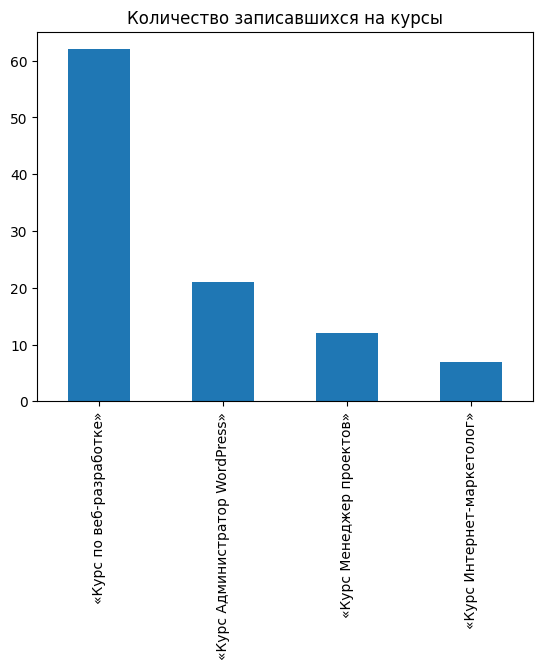

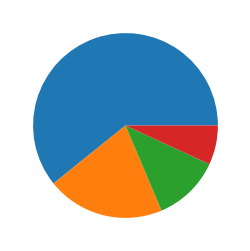

In [ ]:
from matplotlib.colors import CenteredNorm
course = df['Наименование курса'].value_counts()
print(course)
print(course.dtype)
groupdata = df.groupby('Наименование курса').count()
print(groupdata)

course.plot(kind='bar', title='Количество записавшихся на курсы');
fig = plt.figure(figsize=(3,3))
plt.pie(course)
plt.show()